# Mount own Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required python libraries

In [1]:
import os

# drawing
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame
import pandas as pd
import numpy as np

# For ML
# Split Train-Test Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, StandardScaler
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import SVC
# Metrics & Cross validation
from sklearn.metrics import accuracy_score, confusion_matrix

# Exploratory data analysis

In [2]:
# load datasets
csvfile_path = "/content/drive/MyDrive/HW1/Membership_personal_information.csv" # Blank, Filepath
df = pd.read_csv(csvfile_path)
df = df.set_index("ID")
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,High_spending
ID,,,,,,,,,,,,,,,
Member00234,2004,Graduation,Single,34824.0,0,0,2021.7.30,65,1,1,0,2,6,0,0
Member00235,2001,Basic,Single,18746.0,1,0,2021.7.31,41,2,3,0,3,6,0,0
Member00236,1994,2n Cycle,Single,33812.0,1,0,2021.8.1,86,2,2,1,3,6,0,0
Member00237,1976,Graduation,Single,46904.0,1,1,2021.8.1,20,4,5,1,4,8,0,0
Member00238,1966,Graduation,Single,58138.0,0,0,2021.8.1,58,3,8,10,4,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Member02050,1975,Graduation,Together,57811.0,0,1,2023.2.23,49,5,7,2,11,5,0,0
Member02051,1977,Master,Divorced,41335.0,1,0,2023.2.24,24,3,4,1,4,7,0,0
Member02052,1969,Master,Together,73113.0,0,0,2023.2.24,86,1,3,4,7,2,0,0


In [3]:
# print colums
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'High_spending'],
      dtype='object')

<ipython-input-4-489d89ef6146>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_spending_corr = pd.DataFrame(df.corr()["High_spending"])


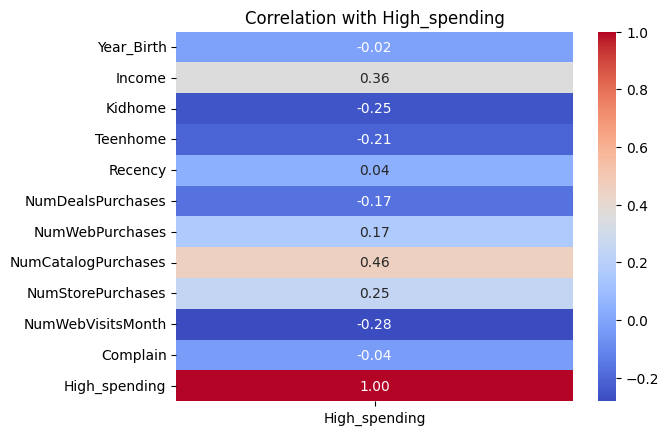

                Feature  Correlation  Rank
1         High_spending     1.000000     1
2   NumCatalogPurchases     0.459030     2
3                Income     0.359665     3
4     NumWebVisitsMonth     0.281927     4
5               Kidhome     0.252657     5
6     NumStorePurchases     0.247941     6
7              Teenhome     0.209506     7
8     NumDealsPurchases     0.170904     8
9       NumWebPurchases     0.167615     9
10              Recency     0.037467    10
11             Complain     0.036068    11
12           Year_Birth     0.016031    12


In [4]:
# heatmap for corelation between high spending and other columns
high_spending_corr = pd.DataFrame(df.corr()["High_spending"])

plt.figure()
sns.heatmap(high_spending_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with High_spending")
plt.show()

# rank the corr
high_spending_corr_abs = abs(high_spending_corr)
high_spending_corr_abs_sorted = high_spending_corr_abs.sort_values(by='High_spending', ascending=False)

high_spending_corr_abs_sorted = high_spending_corr_abs_sorted.reset_index()
high_spending_corr_abs_sorted.index += 1
high_spending_corr_abs_sorted.columns = ['Feature', 'Correlation']
high_spending_corr_abs_sorted['Rank'] = high_spending_corr_abs_sorted.index

print(high_spending_corr_abs_sorted)

(0.0, 13.0)

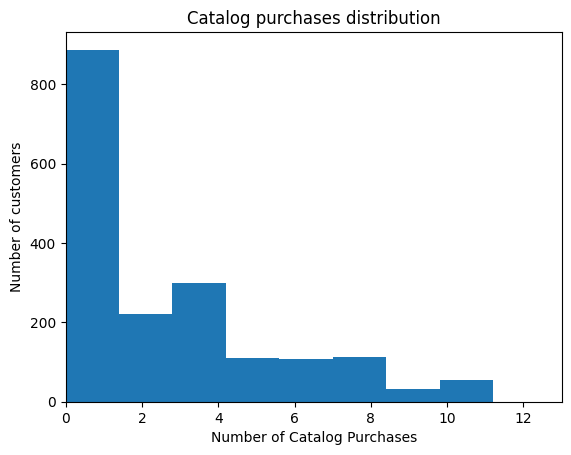

In [5]:
# plot hist using plt
plt.hist(df["NumCatalogPurchases"],bins=20)

# add label
plt.xlabel("Number of Catalog Purchases")
plt.ylabel("Number of customers") # Blank

# add title
plt.title("Catalog purchases distribution")

# remove outlier
plt.xlim(0,13)

(0.0, 200000.0)

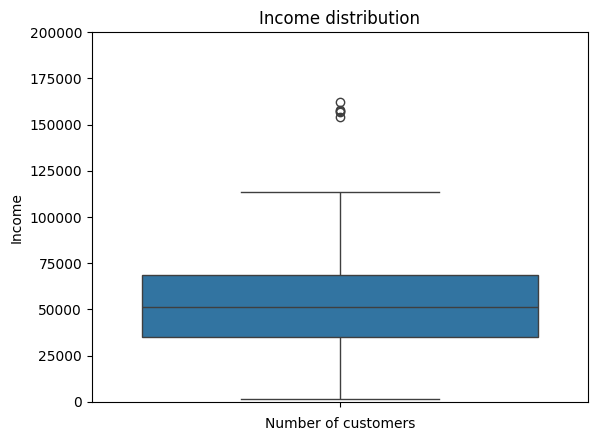

In [6]:
# Box plot using sns
sns.boxplot(df["Income"])

# add label
plt.xlabel("Number of customers")
plt.ylabel("Income") # Blank

# add title
plt.title("Income distribution")

# remove outlier
plt.ylim(0, 200000)

(0.0, 175000.0)

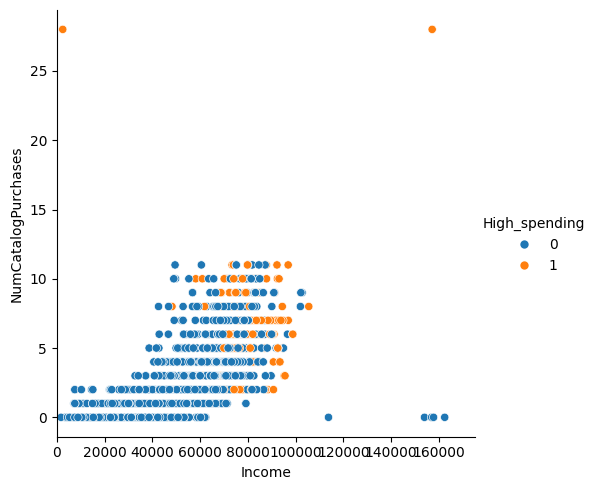

In [7]:
# plot Income - Number of catalog purchases
sns.relplot(data=df, x="Income", y="NumCatalogPurchases", hue="High_spending")

# remove outlier
plt.xlim(0,175000)

# Data preprocessing

In [8]:
# delete value by row
df_dropna = df.dropna(axis = 0)
df_dropna

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,High_spending
ID,,,,,,,,,,,,,,,
Member00234,2004,Graduation,Single,34824.0,0,0,2021.7.30,65,1,1,0,2,6,0,0
Member00235,2001,Basic,Single,18746.0,1,0,2021.7.31,41,2,3,0,3,6,0,0
Member00236,1994,2n Cycle,Single,33812.0,1,0,2021.8.1,86,2,2,1,3,6,0,0
Member00237,1976,Graduation,Single,46904.0,1,1,2021.8.1,20,4,5,1,4,8,0,0
Member00238,1966,Graduation,Single,58138.0,0,0,2021.8.1,58,3,8,10,4,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Member02050,1975,Graduation,Together,57811.0,0,1,2023.2.23,49,5,7,2,11,5,0,0
Member02051,1977,Master,Divorced,41335.0,1,0,2023.2.24,24,3,4,1,4,7,0,0
Member02052,1969,Master,Together,73113.0,0,0,2023.2.24,86,1,3,4,7,2,0,0


In [9]:
# delete Income > 6000000

df_remove_outlier = df_dropna.loc[df_dropna.Income<=6000000]
df_remove_outlier

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,High_spending
ID,,,,,,,,,,,,,,,
Member00234,2004,Graduation,Single,34824.0,0,0,2021.7.30,65,1,1,0,2,6,0,0
Member00235,2001,Basic,Single,18746.0,1,0,2021.7.31,41,2,3,0,3,6,0,0
Member00236,1994,2n Cycle,Single,33812.0,1,0,2021.8.1,86,2,2,1,3,6,0,0
Member00237,1976,Graduation,Single,46904.0,1,1,2021.8.1,20,4,5,1,4,8,0,0
Member00238,1966,Graduation,Single,58138.0,0,0,2021.8.1,58,3,8,10,4,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Member02050,1975,Graduation,Together,57811.0,0,1,2023.2.23,49,5,7,2,11,5,0,0
Member02051,1977,Master,Divorced,41335.0,1,0,2023.2.24,24,3,4,1,4,7,0,0
Member02052,1969,Master,Together,73113.0,0,0,2023.2.24,86,1,3,4,7,2,0,0


In [10]:
# label encoding
LE = LabelEncoder()
df_remove_outlier['Education_'] = LE.fit_transform(df_remove_outlier['Education'])

df_remove_outlier[['Education','Education_']]

,Education,Education_
ID,,
Member00234,Graduation,2
Member00235,Basic,1
Member00236,2n Cycle,0
Member00237,Graduation,2
Member00238,Graduation,2
...,...,...
Member02050,Graduation,2
Member02051,Master,3
Member02052,Master,3


In [11]:
# Select input and outcome
X = df_remove_outlier[['Education_','Income','Year_Birth','Kidhome']]
y = df_remove_outlier[["High_spending"]]

# split dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model 1 training

In [12]:
# select Decision tree
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0) # Blank

# Train the tree model
clf1 = clf1.fit(X_train, y_train)

# Model 1 evaluation

In [13]:
# predict value
y_pred = clf1.predict(X_test)

In [14]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.84


# Model 2 training

In [15]:
# select Logistic Regression
clf2 = LogisticRegression()

# Train the Logistic Regression model
clf2 = clf2.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model 2 evaluation

In [16]:
# predict value
y_pred2 = clf2.predict(X_test)

In [17]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))

Accuracy: 0.86


# Model 3 training

In [18]:
# select SVM
clf3 = SVC(kernel='poly')

# Train the SVM model
clf3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

# Model 3 evaluation

In [19]:
# predict value
y_pred3 = clf3.predict(X_test)

In [20]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred3))

Accuracy: 0.85


# Comparing models

In [21]:
# test result assemble

test_result = pd.DataFrame()

test_result["y_test"] = y_test
test_result["y_tree"] = y_pred
test_result["y_logistic"] = y_pred2
test_result["y_svm"] = y_pred3
test_result

,y_test,y_tree,y_logistic,y_svm
ID,,,,
Member00835,0,0,0,0
Member01074,0,0,0,0
Member01422,0,0,0,0
Member00705,0,0,0,0
Member01977,0,0,0,0
...,...,...,...,...
Member01795,0,0,0,0
Member01927,0,0,0,0
Member01548,0,0,0,0


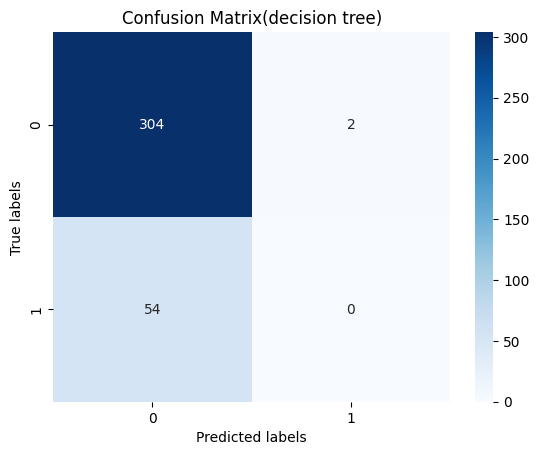

In [22]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix(decision tree)')
plt.show()

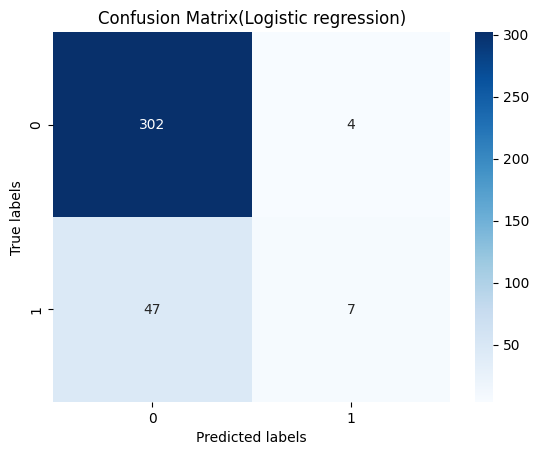

In [23]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix(Logistic regression)')
plt.show()

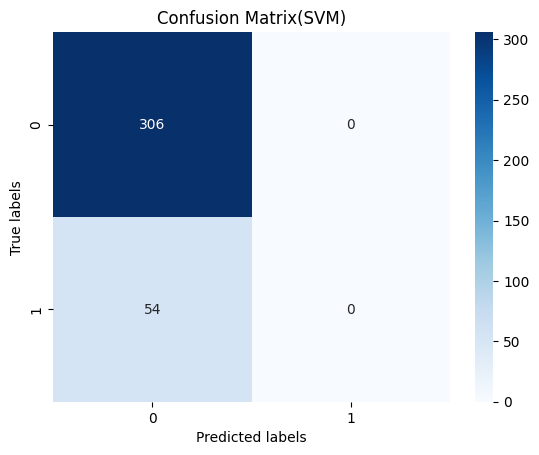

In [24]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix(SVM)')
plt.show()

# Modify the model and/or preprocessing methods

In [25]:
## modify preprocessing methods

# delete Year Birth < 1940

df_remove_outlier_mod = df_remove_outlier.loc[df_remove_outlier.Year_Birth>=1940]
df_remove_outlier_mod

# Normalization
index = df_remove_outlier_mod.index
numeric_cols = ['Income', 'NumCatalogPurchases', 'Year_Birth']
numeric_data = df_remove_outlier_mod[numeric_cols]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols, index=index)
df_preprocessed = pd.concat([df_remove_outlier_mod.drop(columns=numeric_cols), normalized_df], axis=1)

# Select input and outcome
X_mod = df_preprocessed[['Education_','Income','NumCatalogPurchases', 'Year_Birth']]
y_mod = df_preprocessed[['High_spending']]

# split dataset
X_train_mod,X_test_mod,y_train_mod,y_test_mod = train_test_split(X_mod, y_mod, test_size=0.2, random_state=0)

In [26]:
# select Logistic Regression
class_weights = {0: 1, 1: 2}
clf2_mod = LogisticRegression(class_weight=class_weights)

# Train the Logistic Regression model
clf2_mod = clf2_mod.fit(X_train_mod, y_train_mod)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# predict value
y_pred2_mod = clf2_mod.predict(X_test_mod)

print('Accuracy: %.2f' % accuracy_score(y_test_mod, y_pred2_mod))

Accuracy: 0.88


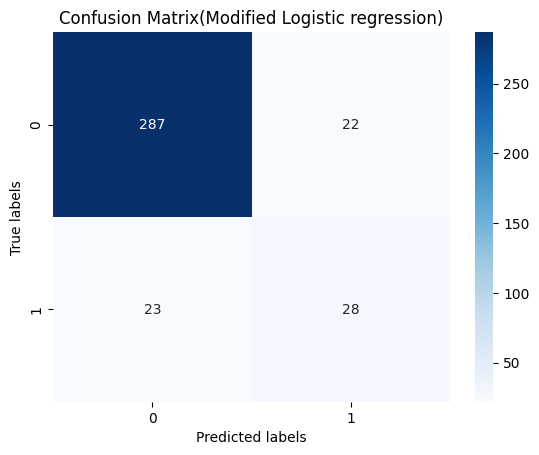

In [28]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test_mod, y_pred2_mod)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix(Modified Logistic regression)')
plt.show()

# Apply the Model on New Membership Data

In [31]:
# Data load

csvfile_path = "/content/drive/MyDrive/HW1/NewMembership_personal_information.csv" # Blank, Filepath
new_df = pd.read_csv(csvfile_path)
new_df = new_df.set_index("ID")
new_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
ID,,,,,,,,,,,,,,
N_member00001,1980,Graduation,Married,90765.0,0,0,2022.12.29,25,0,4,6,5,1,0
N_member00002,1957,PhD,Together,81574.0,0,0,2022.12.30,89,1,4,5,8,1,0
N_member00003,1976,Graduation,Single,86358.0,1,1,2023.1.3,78,4,5,3,6,8,0
N_member00004,1963,Graduation,Together,94384.0,0,0,2023.1.7,62,0,5,8,5,2,0
N_member00005,1986,PhD,Together,72335.0,0,0,2023.1.13,2,1,10,4,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N_member00415,1983,PhD,Alone,35860.0,1,1,2023.6.28,37,2,1,1,2,5,0
N_member00416,1983,PhD,Divorced,35860.0,1,1,2023.6.28,37,2,1,1,2,5,0
N_member00417,1983,PhD,Divorced,35860.0,1,1,2023.6.28,37,2,1,1,2,5,0


In [42]:
# Data preprocessing

# delete value by row
new_df_dropna = new_df.dropna(axis = 0)

# label encoding
LE = LabelEncoder()
new_df_dropna['Education_'] = LE.fit_transform(new_df_dropna['Education'])

# Normalization
index = new_df_dropna.index
numeric_cols = ['Income', 'NumCatalogPurchases', 'Year_Birth']
numeric_data = new_df_dropna[numeric_cols]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

normalized_new_df = pd.DataFrame(normalized_data, columns=numeric_cols, index=index)
new_df_preprocessed = pd.concat([new_df_dropna.drop(columns=numeric_cols), normalized_new_df], axis=1)

# Select input
X_new = new_df_preprocessed[['Education_','Income','NumCatalogPurchases', 'Year_Birth']]

<ipython-input-42-6b18344cbd17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_dropna['Education_'] = LE.fit_transform(new_df_dropna['Education'])


In [43]:
# predict
y_pred_new = clf2_mod.predict(X_new)

In [59]:
# make result into data frame
new_result = pd.DataFrame(index=index)
new_result['prediction'] = y_pred_new

# get path
drivefolder = os.path.dirname(csvfile_path)

# save to csv file
new_result.to_csv(os.path.join(drivefolder,"Assignment1_prediction_2070044_오예인.csv"))